In [2]:
#dataset
import json
import pandas as pd
import re
import jieba 
import jieba.analyse
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from datetime import datetime
from imblearn.over_sampling import RandomOverSampler
import scipy.stats as stats

In [3]:
#Feature identification for users' profile
#TF-IDF
df_merged_balanced_all_columns= pd.read_csv('df_merged_balanced_all_columns.csv')

In [4]:
df_merged=df_merged_balanced_all_columns.copy()

In [5]:
# variables to describe the user's profile
df_user=df_merged[['ID','label','gender','profile','birthday','num_of_follower','num_of_following','all_tweet_count',
                                    'original_tweet_count','repost_tweet_count']]

In [6]:
df_user

,ID,label,gender,profile,birthday,num_of_follower,num_of_following,all_tweet_count,original_tweet_count,repost_tweet_count
0,15315,0,女,很会害羞,水瓶座,413,1672,3634,50,32
1,17978,0,女,我想去一个地方、和你或者是自己看风吹麦浪,无,488,145,1969,41,57
2,221,0,女,一诚抵万恶,2000-04-26,135,797,148,65,25
3,16604,0,女,若你喜欢怪人 那我也还不错,无,4913,251,712,100,1
4,20755,0,女,专业丰胸私护达人+卫❤️：tingting395506,1987-10-23,336670,1126,9999,100,0
...,...,...,...,...,...,...,...,...,...,...
20645,10321,1,男,无,无,24,2,96,94,2
20646,10322,1,女,🆕,双子座,145,501,2519,21,5
20647,10323,1,女,无,0000-12-03,345,1003,4218,28,1
20648,10324,1,男,教育！科学！学会读书，便是点燃火炬；每个字的每个音节都发射火星。,1981-08-16,243,307,148,24,2


In [7]:
# Filter the data for label 1 and label 0
label_1_data = df_user[df_user['label'] == 1]
label_0_data = df_user[df_user['label'] == 0]

In [8]:
label_1_data

,ID,label,gender,profile,birthday,num_of_follower,num_of_following,all_tweet_count,original_tweet_count,repost_tweet_count
10325,1,1,男,此人严重丧，不适绕行，谢谢,1993-12-10,1,0,10,10,0
10326,2,1,女,无,1997-06-07,173,76,219,79,70
10327,3,1,女,喜提呼伦贝尔大草原五个月。,无,22,205,6188,24,5
10328,4,1,女,无,无,2,9,62,17,6
10329,5,1,女,无,2001-09-25,1,27,6,6,0
...,...,...,...,...,...,...,...,...,...,...
20645,10321,1,男,无,无,24,2,96,94,2
20646,10322,1,女,🆕,双子座,145,501,2519,21,5
20647,10323,1,女,无,0000-12-03,345,1003,4218,28,1
20648,10324,1,男,教育！科学！学会读书，便是点燃火炬；每个字的每个音节都发射火星。,1981-08-16,243,307,148,24,2


In [9]:
label_0_data

,ID,label,gender,profile,birthday,num_of_follower,num_of_following,all_tweet_count,original_tweet_count,repost_tweet_count
0,15315,0,女,很会害羞,水瓶座,413,1672,3634,50,32
1,17978,0,女,我想去一个地方、和你或者是自己看风吹麦浪,无,488,145,1969,41,57
2,221,0,女,一诚抵万恶,2000-04-26,135,797,148,65,25
3,16604,0,女,若你喜欢怪人 那我也还不错,无,4913,251,712,100,1
4,20755,0,女,专业丰胸私护达人+卫❤️：tingting395506,1987-10-23,336670,1126,9999,100,0
...,...,...,...,...,...,...,...,...,...,...
10320,22223,0,男,👿,2002-12-12,10,86,1903,16,84
10321,22226,0,男,无,无,9,142,42,10,26
10322,22228,0,男,只是一个路人粉,0001-00-00,83,164,5523,68,30
10323,22243,0,男,无,无,11,41,6,6,0


In [10]:
df_user['gender'] = df_user['gender'].replace({'男': 'Male', '女': 'Female', '无': pd.NaT})

C:\Users\User\AppData\Local\Temp\ipykernel_23224\1390364340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['gender'] = df_user['gender'].replace({'男': 'Male', '女': 'Female', '无': pd.NaT})


In [11]:
# show gender count
gender = df_user['gender'].value_counts()
print(gender)

Female    12726
Male       7924
Name: gender, dtype: int64


In [12]:
# group the dataframe by label and gender
grouped = df_user.groupby(['label', 'gender']).size().reset_index(name='count')

In [13]:
grouped

,label,gender,count
0,0,Female,5000
1,0,Male,5325
2,1,Female,7726
3,1,Male,2599


In [14]:
#  the dataframe to create a table of counts
table = grouped.pivot(index='gender', columns='label', values='count')
print(table)

label      0     1
gender            
Female  5000  7726
Male    5325  2599


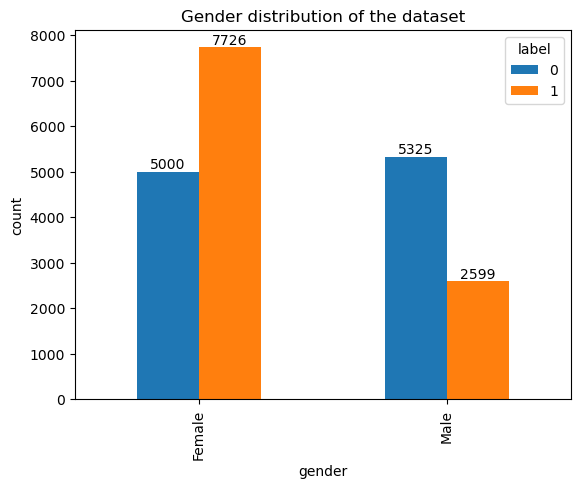

In [17]:
ax = table.plot(kind='bar')

# Display the numbers on the plot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.xlabel("gender")
plt.ylabel("count")
plt.title("Gender distribution of the dataset")
plt.show()

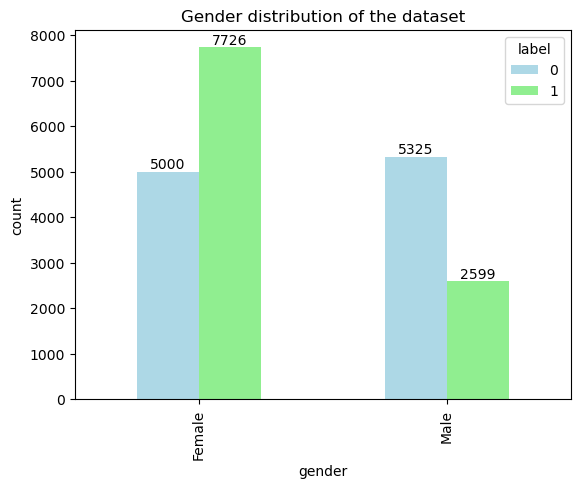

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'table' is the DataFrame created using pivot
ax = table.plot(kind='bar', color=['lightblue', 'lightgreen', 'orange', 'red'])

# Display the numbers on the plot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Set labels and title
plt.xlabel("gender")
plt.ylabel("count")
plt.title("Gender distribution of the dataset")

# Show the plot
plt.show()


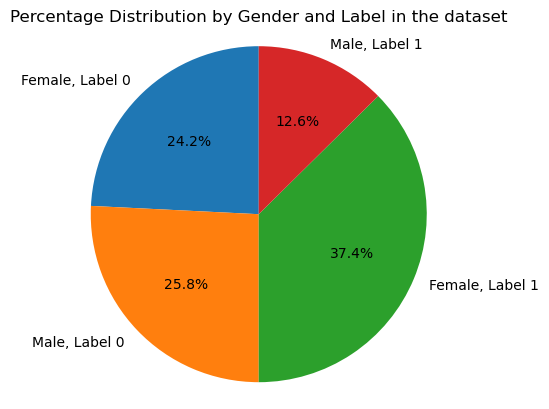

In [20]:
# Grouped data
labels = ['Female, Label 0',  'Male, Label 0', 'Female, Label 1','Male, Label 1']
sizes = grouped['count']
explode = (0, 0, 0, 0)  # No slice will be exploded

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage Distribution by Gender and Label in the dataset')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

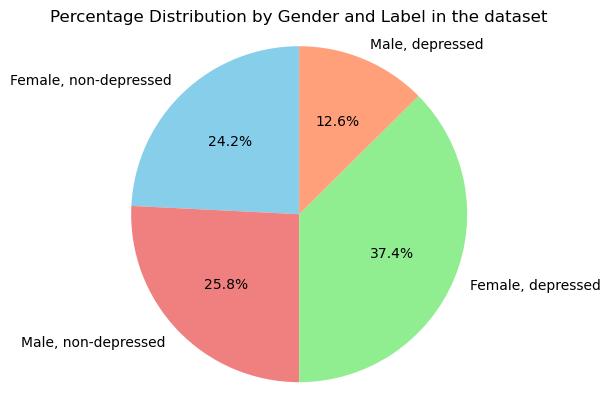

In [22]:
# Grouped data
labels = ['Female, non-depressed', 'Male, non-depressed', 'Female, depressed', 'Male, depressed']
sizes = grouped['count']
explode = (0, 0, 0, 0)  # No slice will be exploded

# Custom colors for each slice
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']

# Plotting the pie chart with custom colors
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Add a title
plt.title('Percentage Distribution by Gender and Label in the dataset')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


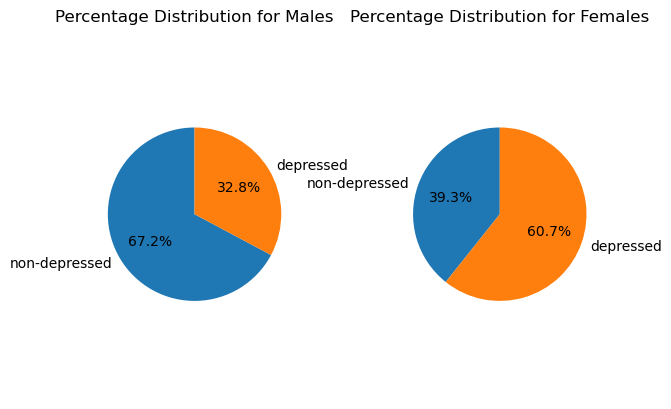

In [27]:
# Filter the data for males and females
male_data = grouped[grouped['gender'] == 'Male']
female_data = grouped[grouped['gender'] == 'Female']


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

# Pie chart for males
labels_male = ['non-depressed', 'depressed']
sizes_male = male_data['count']
explode_male = (0, 0)  # No slice will be exploded
axes[0].pie(sizes_male, explode=explode_male, labels=labels_male, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Percentage Distribution for Males')

# Pie chart for females
labels_female = ['non-depressed', 'depressed']
sizes_female = female_data['count']
explode_female = (0, 0)  # No slice will be exploded
axes[1].pie(sizes_female, explode=explode_female, labels=labels_female, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Percentage Distribution for Females')

# Custom colors for each slice
colors = ['skyblue', 'lightcoral']

# Equal aspect ratio ensures that pies are drawn as circles
axes[0].axis('equal')
axes[1].axis('equal')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Display the plot
plt.show()

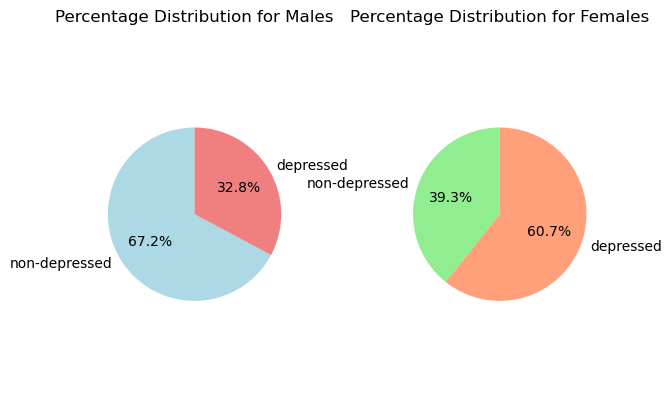

In [30]:
# Filter the data for males and females
male_data = grouped[grouped['gender'] == 'Male']
female_data = grouped[grouped['gender'] == 'Female']

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

# Pie chart for males
labels_male = ['non-depressed', 'depressed']
sizes_male = male_data['count']
explode_male = (0, 0)  # No slice will be exploded
colors_male = ['lightblue', 'lightcoral']  # Custom colors for males
axes[0].pie(sizes_male, explode=explode_male, labels=labels_male, autopct='%1.1f%%', startangle=90, colors=colors_male)
axes[0].set_title('Percentage Distribution for Males')

# Pie chart for females
labels_female = ['non-depressed', 'depressed']
sizes_female = female_data['count']
explode_female = (0, 0)  # No slice will be exploded
colors_female = ['lightgreen', 'lightsalmon']  # Custom colors for females
axes[1].pie(sizes_female, explode=explode_female, labels=labels_female, autopct='%1.1f%%', startangle=90, colors=colors_female)
axes[1].set_title('Percentage Distribution for Females')

# Equal aspect ratio ensures that pies are drawn as circles
axes[0].axis('equal')
axes[1].axis('equal')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Display the plot
plt.show()
